In [1]:
!pip install scikit-plot scikit-learn-intelex

### Importing Libraries
import pandas as pd
import numpy as np
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearnex import patch_sklearn

import warnings
warnings.filterwarnings('ignore')

### Import your dataset

# Reading the .xlsx dataset into the dataframe
df = pd.read_csv("AIDA-PHQ-Updated.csv")

### Data preprocessing

# Ordinal mappings
ordinal_mappings = {
    'Not Applicable': 0,
    'Strongly disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly agree': 5
}

# Applying ordinal mappings
ordinal_columns = [
    'PoorAcademicPerformanceSelfPerception', 'AcademicCriticismSelfPerception',
    'UnsatisfiedAcademicWorkloadSelfPerception', 'NonInterestSubjectOpinion',
    'UnhappySubjectOpinion', 'NonInterestInstitutionOpinion',
    'UnhappyInstitutionOpinion', 'ParentalStrictness', 'ParentalAcademicPressure',
    'ParentalMarriagePressure', 'ParentalCareerPressure', 'ParentalStudyAbroadPressure',
    'ParentalUnderstanding', 'SiblingBonding', 'ParentalRelationshipStability',
    'PeerRelationship', 'TeacherSupport', 'PartnerRelationshipImpact',
    'PhysicalViolenceExperience', 'SexualViolenceExperience', 'VerbalViolenceExperience',
    'EmotionalViolenceExperience'
]

for col in ordinal_columns:
    df[col] = df[col].map(ordinal_mappings)

# Encode the Gender column
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

# Fill missing values
for col in ordinal_columns:
    if df[col].isna().any():
        df[col].fillna(df[col].median(), inplace=True)

# Assign features (X) and target variable (y)
X = df[['Age', 'Gender', 'little interest', 'feeling down', 'Sleeping issue', 'feeling tired',
        'poor appetite', 'feeling bad', 'trouble concertrating', 'slowness', 'self harm',
        'ParentalUnderstanding', 'SiblingBonding', 'ParentalRelationshipStability',
        'PeerRelationship', 'TeacherSupport', 'PartnerRelationshipImpact']]
y = df['DepressionLevel']

### Train Test Split

initial_random_state = 2024
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=initial_random_state)

### Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Define classifiers with best hyperparameters

best_classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=9, metric='euclidean'),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=1, min_samples_split=2),
    'Random Forest': RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=19, min_samples_leaf=1, min_samples_split=2, max_features='auto'),
    'Logistic Regression': LogisticRegression(C=100.0, solver='newton-cg'),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(C=10.0, kernel='linear', degree=2, gamma=0.01, probability=True),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, learning_rate=1, algorithm='SAMME'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=1, min_samples_leaf=4, min_samples_split=2, loss='log_loss')
}

### Evaluate classifiers

# Store evaluation metrics
evaluation_metrics = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for name in best_classifiers.keys()}

### Varying seed value for random_state

# Loop to change random state and evaluate models
for i in range(5):
    random_state = initial_random_state + i
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Evaluate each classifier
    for classifier_name, classifier in best_classifiers.items():
        # Train the classifier
        classifier.fit(X_train, y_train)

        # Predict using the trained classifier
        y_pred = classifier.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Store evaluation metrics
        evaluation_metrics[classifier_name]['accuracy'].append(accuracy)
        evaluation_metrics[classifier_name]['precision'].append(precision)
        evaluation_metrics[classifier_name]['recall'].append(recall)
        evaluation_metrics[classifier_name]['f1'].append(f1)

# Calculate and print mean and uncertainty (standard deviation) with 2 decimal places
for name, metrics in evaluation_metrics.items():
    mean_accuracy = np.mean(metrics['accuracy'])
    std_accuracy = np.std(metrics['accuracy'])
    mean_precision = np.mean(metrics['precision'])
    std_precision = np.std(metrics['precision'])
    mean_recall = np.mean(metrics['recall'])
    std_recall = np.std(metrics['recall'])
    mean_f1 = np.mean(metrics['f1'])
    std_f1 = np.std(metrics['f1'])

    print(f"-------------{name}:-------------")
    print(f"Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Precision: {mean_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall: {mean_recall:.4f} ± {std_recall:.4f}")
    print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
    print()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.3/151.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 MB 9.5 MB/s eta 0:00:00
-------------KNN:-------------
Accuracy: 0.6904 ± 0.0367
Precision: 0.7313 ± 0.0307
Recall: 0.6508 ± 0.0409
F1 Score: 0.6618 ± 0.0392

-------------Decision Tree:-------------
Accuracy: 0.6885 ± 0.0449
Precision: 0.6984 ± 0.0300
Recall: 0.6468 ± 0.0481
F1 Score: 0.6583 ± 0.0418

-------------Random Forest:-------------
Accuracy: 0.8173 ± 0.0327
Precision: 0.8439 ± 0.0175
Recall: 0.7840 ± 0.0365
F1 Score: 0.8038 ± 0.0308

-------------Logistic Regression:-------------
Accuracy: 0.9442 ± 0.0223
Precision: 0.9051 ± 0.0349
Recall: 0.8963 ± 0.0343
F1 Score: 0.8963 ± 0.0365

-------------Naive Bayes:-------------
Accuracy: 0.7788 ± 0.0211
Precision: 0.7815 ± 0.0379
Recall: 0.7401 ± 0.0373
F1 Score: 0.7509 ± 0.0394

-------------SVM:-------------
Accurac

In [2]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('svm', SVC(C=10.0, degree=2, gamma=0.01, kernel='linear', probability=True)),
    ('rf', RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=19, min_samples_leaf=1, min_samples_split=2, max_features='auto')),
    ('gbm', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=1, min_samples_leaf=4, min_samples_split=2, loss='log_loss'))
]

# Define the meta-model
meta_model = LogisticRegression(C=100.0, solver='lbfgs')

# Store evaluation metrics, use 'evaluation_metrics' instead of 'evaluation'
evaluation_metrics['Stacking'] = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Split the dataset into training and testing sets

for i in range(5):
    random_state = initial_random_state + i
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Create the stacking classifier
    stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

    # Train the stacking classifier
    stacking_clf.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = stacking_clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')


    # Store evaluation metrics, use 'Stacking' as the classifier name since it's a new model
    evaluation_metrics['Stacking']['accuracy'].append(accuracy)
    evaluation_metrics['Stacking']['precision'].append(precision)
    evaluation_metrics['Stacking']['recall'].append(recall)
    evaluation_metrics['Stacking']['f1'].append(f1)




# Calculate and print mean and uncertainty (standard deviation)
for name, metrics in evaluation_metrics.items(): # Use 'evaluation_metrics'
    mean_accuracy = np.mean(metrics['accuracy'])
    std_accuracy = np.std(metrics['accuracy'])
    mean_precision = np.mean(metrics['precision'])
    std_precision = np.std(metrics['precision'])
    mean_recall = np.mean(metrics['recall'])
    std_recall = np.std(metrics['recall'])
    mean_f1 = np.mean(metrics['f1'])
    std_f1 = np.std(metrics['f1'])

    print(f"-------------{name}:-------------")
    print(f"Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Precision: {mean_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall: {mean_recall:.4f} ± {std_recall:.4f}")
    print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
    print()

-------------KNN:-------------
Accuracy: 0.6904 ± 0.0367
Precision: 0.7313 ± 0.0307
Recall: 0.6508 ± 0.0409
F1 Score: 0.6618 ± 0.0392

-------------Decision Tree:-------------
Accuracy: 0.6885 ± 0.0449
Precision: 0.6984 ± 0.0300
Recall: 0.6468 ± 0.0481
F1 Score: 0.6583 ± 0.0418

-------------Random Forest:-------------
Accuracy: 0.8173 ± 0.0327
Precision: 0.8439 ± 0.0175
Recall: 0.7840 ± 0.0365
F1 Score: 0.8038 ± 0.0308

-------------Logistic Regression:-------------
Accuracy: 0.9442 ± 0.0223
Precision: 0.9051 ± 0.0349
Recall: 0.8963 ± 0.0343
F1 Score: 0.8963 ± 0.0365

-------------Naive Bayes:-------------
Accuracy: 0.7788 ± 0.0211
Precision: 0.7815 ± 0.0379
Recall: 0.7401 ± 0.0373
F1 Score: 0.7509 ± 0.0394

-------------SVM:-------------
Accuracy: 0.9577 ± 0.0115
Precision: 0.9175 ± 0.0256
Recall: 0.9133 ± 0.0240
F1 Score: 0.9122 ± 0.0241

-------------AdaBoost:-------------
Accuracy: 0.5442 ± 0.0262
Precision: 0.3198 ± 0.0132
Recall: 0.4594 ± 0.0304
F1 Score: 0.3726 ± 0.0146

------

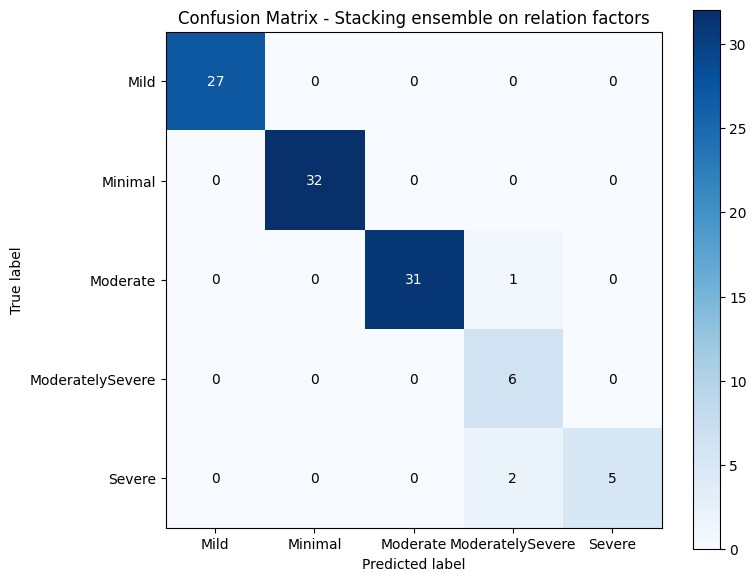

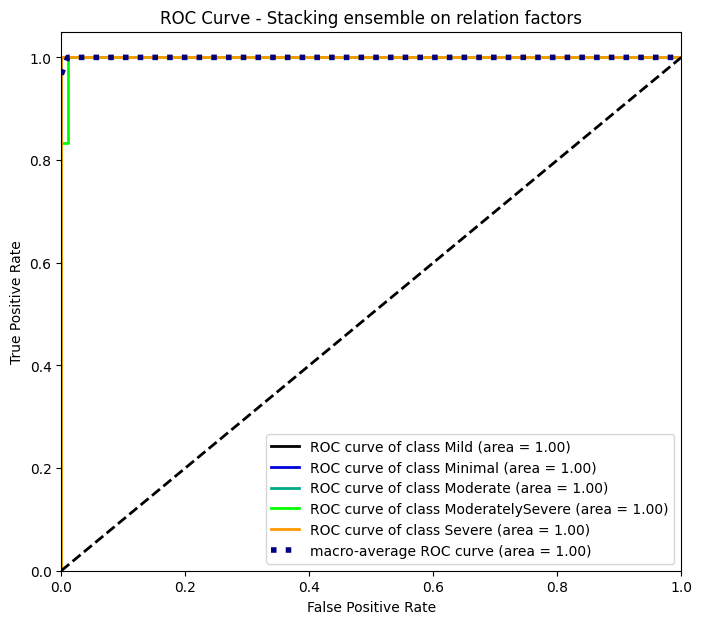

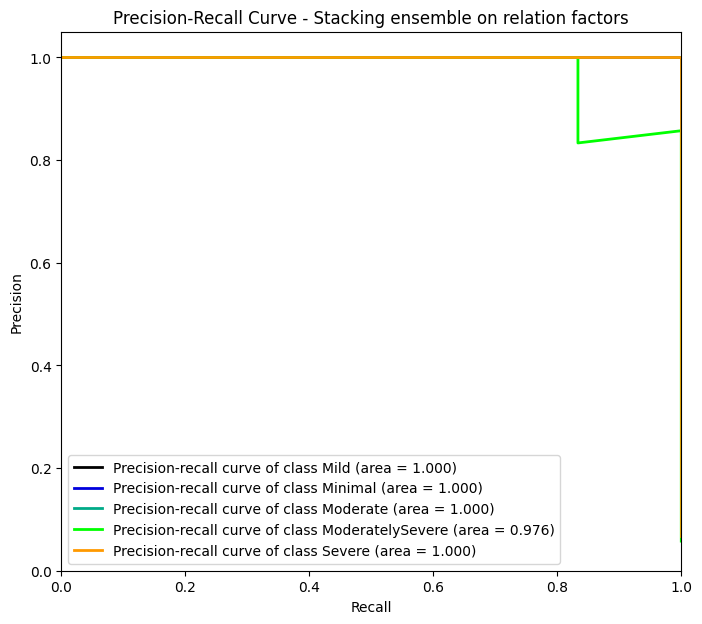

In [3]:
    # Plot confusion matrix with classifier name
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(8,7), title=f"Confusion Matrix - {name} ensemble on relation factors");

    # Plot ROC curve with classifier name
    y_probas = stacking_clf.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas, figsize=(8,7), plot_micro=False, plot_macro=True, title=f"ROC Curve - {name} ensemble on relation factors");

    # Plot PRC curve with classifier name
    skplt.metrics.plot_precision_recall(y_test, y_probas, figsize=(8,7), plot_micro=False, title=f"Precision-Recall Curve - {name} ensemble on relation factors");

In [4]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Define the XGBoost classifier
xgb_clf = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=1, min_samples_leaf=4, min_samples_split=2, loss='log_loss')

# Store evaluation metrics
evaluation_metrics['XGBoost'] = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Split the dataset into training and testing sets
for i in range(5):
    random_state = initial_random_state + i
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Encode the target variable to numerical labels
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # Train the XGBoost classifier
    xgb_clf.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = xgb_clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store evaluation metrics
    evaluation_metrics['XGBoost']['accuracy'].append(accuracy)
    evaluation_metrics['XGBoost']['precision'].append(precision)
    evaluation_metrics['XGBoost']['recall'].append(recall)
    evaluation_metrics['XGBoost']['f1'].append(f1)

# Calculate and print mean and uncertainty (standard deviation)
for name, metrics in evaluation_metrics.items():
    mean_accuracy = np.mean(metrics['accuracy'])
    std_accuracy = np.std(metrics['accuracy'])
    mean_precision = np.mean(metrics['precision'])
    std_precision = np.std(metrics['precision'])
    mean_recall = np.mean(metrics['recall'])
    std_recall = np.std(metrics['recall'])
    mean_f1 = np.mean(metrics['f1'])
    std_f1 = np.std(metrics['f1'])

    print(f"-------------{name}:-------------")
    print(f"Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Precision: {mean_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall: {mean_recall:.4f} ± {std_recall:.4f}")
    print(f"F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
    print()

-------------KNN:-------------
Accuracy: 0.6904 ± 0.0367
Precision: 0.7313 ± 0.0307
Recall: 0.6508 ± 0.0409
F1 Score: 0.6618 ± 0.0392

-------------Decision Tree:-------------
Accuracy: 0.6885 ± 0.0449
Precision: 0.6984 ± 0.0300
Recall: 0.6468 ± 0.0481
F1 Score: 0.6583 ± 0.0418

-------------Random Forest:-------------
Accuracy: 0.8173 ± 0.0327
Precision: 0.8439 ± 0.0175
Recall: 0.7840 ± 0.0365
F1 Score: 0.8038 ± 0.0308

-------------Logistic Regression:-------------
Accuracy: 0.9442 ± 0.0223
Precision: 0.9051 ± 0.0349
Recall: 0.8963 ± 0.0343
F1 Score: 0.8963 ± 0.0365

-------------Naive Bayes:-------------
Accuracy: 0.7788 ± 0.0211
Precision: 0.7815 ± 0.0379
Recall: 0.7401 ± 0.0373
F1 Score: 0.7509 ± 0.0394

-------------SVM:-------------
Accuracy: 0.9577 ± 0.0115
Precision: 0.9175 ± 0.0256
Recall: 0.9133 ± 0.0240
F1 Score: 0.9122 ± 0.0241

-------------AdaBoost:-------------
Accuracy: 0.5442 ± 0.0262
Precision: 0.3198 ± 0.0132
Recall: 0.4594 ± 0.0304
F1 Score: 0.3726 ± 0.0146

------